# Exploratory Data Analysis

In [8]:
#load the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [9]:
data = pd.read_csv("/content/data_clean.csv",index_col=0) # No index column will be displayed

In [10]:
data.head()

Ozone  Solar.R  Wind Temp C Month  Day  Year  Temp Weather
1   41.0    190.0   7.4     67     5    1  2010    67       S
2   36.0    118.0   8.0     72     5    2  2010    72       C
3   12.0    149.0  12.6     74     5    3  2010    74      PS
4   18.0    313.0  11.5     62     5    4  2010    62       S
5    NaN      NaN  14.3     56     5    5  2010    56       S

In [11]:
data

Ozone  Solar.R  Wind Temp C Month  Day  Year  Temp Weather
1     41.0    190.0   7.4     67     5    1  2010    67       S
2     36.0    118.0   8.0     72     5    2  2010    72       C
3     12.0    149.0  12.6     74     5    3  2010    74      PS
4     18.0    313.0  11.5     62     5    4  2010    62       S
5      NaN      NaN  14.3     56     5    5  2010    56       S
..     ...      ...   ...    ...   ...  ...   ...   ...     ...
154   41.0    190.0   7.4     67     5    1  2010    67       C
155   30.0    193.0   6.9     70     9   26  2010    70      PS
156    NaN    145.0  13.2     77     9   27  2010    77       S
157   14.0    191.0  14.3     75     9   28  2010    75       S
158   18.0    131.0   8.0     76     9   29  2010    76       C

[158 rows x 9 columns]

In [12]:
data.tail(10)

Ozone  Solar.R  Wind Temp C Month  Day  Year  Temp Weather
149   30.0    193.0   6.9     70     9   26  2010    70       C
150    NaN    145.0  13.2     77     9   27  2010    77      PS
151   14.0    191.0  14.3     75     9   28  2010    75       S
152   18.0    131.0   8.0     76     9   29  2010    76      PS
153   20.0    223.0  11.5     68     9   30  2010    68       S
154   41.0    190.0   7.4     67     5    1  2010    67       C
155   30.0    193.0   6.9     70     9   26  2010    70      PS
156    NaN    145.0  13.2     77     9   27  2010    77       S
157   14.0    191.0  14.3     75     9   28  2010    75       S
158   18.0    131.0   8.0     76     9   29  2010    76       C

In [13]:
#shape of data
print(data.shape)

(158, 9)


In [14]:
#data types
data.dtypes # check data types of all variables

Ozone      float64
Solar.R    float64
Wind       float64
Temp C      object
Month       object
Day          int64
Year         int64
Temp         int64
Weather     object
dtype: object

In [15]:
data.describe()

Ozone     Solar.R        Wind         Day    Year        Temp
count  120.000000  151.000000  158.000000  158.000000   158.0  158.000000
mean    41.583333  185.403974    9.957595   16.006329  2010.0   77.727848
std     32.620709   88.723103    3.511261    8.997166     0.0    9.377877
min      1.000000    7.000000    1.700000    1.000000  2010.0   56.000000
25%     18.000000  119.000000    7.400000    8.000000  2010.0   72.000000
50%     30.500000  197.000000    9.700000   16.000000  2010.0   78.500000
75%     61.500000  257.000000   11.875000   24.000000  2010.0   84.000000
max    168.000000  334.000000   20.700000   31.000000  2010.0   97.000000

In [16]:
data.info() # find missing values

<class 'pandas.core.frame.DataFrame'>
Int64Index: 158 entries, 1 to 158
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Ozone    120 non-null    float64
 1   Solar.R  151 non-null    float64
 2   Wind     158 non-null    float64
 3   Temp C   158 non-null    object 
 4   Month    158 non-null    object 
 5   Day      158 non-null    int64  
 6   Year     158 non-null    int64  
 7   Temp     158 non-null    int64  
 8   Weather  155 non-null    object 
dtypes: float64(3), int64(3), object(3)
memory usage: 12.3+ KB


# Data type conversion

In [17]:
data['Month']=pd.to_numeric(data['Month'],errors='coerce') #replace with  NA
data['Temp C']=pd.to_numeric(data['Temp C'],errors='coerce')# coerce will introduce NA values for non numeric data in the columns
data['Weather']=data['Weather'].astype('category') #data['Wind']=data['Wind'].astype('int64')

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 158 entries, 1 to 158
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   Ozone    120 non-null    float64 
 1   Solar.R  151 non-null    float64 
 2   Wind     158 non-null    float64 
 3   Temp C   157 non-null    float64 
 4   Month    157 non-null    float64 
 5   Day      158 non-null    int64   
 6   Year     158 non-null    int64   
 7   Temp     158 non-null    int64   
 8   Weather  155 non-null    category
dtypes: category(1), float64(5), int64(3)
memory usage: 11.4 KB


####More on data type conversions
[link text](https://stackoverflow.com/questions/15891038/change-column-type-in-pandas)

# Duplicates

In [19]:
# data.loc[159]=[1,12,13,18,17,10]
# data.loc[160]=[1,12,13,18,17,10]

In [20]:
data.duplicated() # if any 2 rows has same values

1      False
2      False
3      False
4      False
5      False
       ...  
154    False
155    False
156    False
157     True
158    False
Length: 158, dtype: bool

In [21]:
#Count of duplicated rows
data[data.duplicated()].shape

(1, 9)

In [22]:
data

Ozone  Solar.R  Wind  Temp C  Month  Day  Year  Temp Weather
1     41.0    190.0   7.4    67.0    5.0    1  2010    67       S
2     36.0    118.0   8.0    72.0    5.0    2  2010    72       C
3     12.0    149.0  12.6    74.0    5.0    3  2010    74      PS
4     18.0    313.0  11.5    62.0    5.0    4  2010    62       S
5      NaN      NaN  14.3    56.0    5.0    5  2010    56       S
..     ...      ...   ...     ...    ...  ...   ...   ...     ...
154   41.0    190.0   7.4    67.0    5.0    1  2010    67       C
155   30.0    193.0   6.9    70.0    9.0   26  2010    70      PS
156    NaN    145.0  13.2    77.0    9.0   27  2010    77       S
157   14.0    191.0  14.3    75.0    9.0   28  2010    75       S
158   18.0    131.0   8.0    76.0    9.0   29  2010    76       C

[158 rows x 9 columns]

In [23]:
#Print the duplicated rows, Record 151 and 157 are duplicate rows
data[data.duplicated()]

Ozone  Solar.R  Wind  Temp C  Month  Day  Year  Temp Weather
157   14.0    191.0  14.3    75.0    9.0   28  2010    75       S

In [24]:
data_cleaned1=data.drop_duplicates()

In [25]:
data_cleaned1.shape

(157, 9)

# Drop columns

In [26]:
data

Ozone  Solar.R  Wind  Temp C  Month  Day  Year  Temp Weather
1     41.0    190.0   7.4    67.0    5.0    1  2010    67       S
2     36.0    118.0   8.0    72.0    5.0    2  2010    72       C
3     12.0    149.0  12.6    74.0    5.0    3  2010    74      PS
4     18.0    313.0  11.5    62.0    5.0    4  2010    62       S
5      NaN      NaN  14.3    56.0    5.0    5  2010    56       S
..     ...      ...   ...     ...    ...  ...   ...   ...     ...
154   41.0    190.0   7.4    67.0    5.0    1  2010    67       C
155   30.0    193.0   6.9    70.0    9.0   26  2010    70      PS
156    NaN    145.0  13.2    77.0    9.0   27  2010    77       S
157   14.0    191.0  14.3    75.0    9.0   28  2010    75       S
158   18.0    131.0   8.0    76.0    9.0   29  2010    76       C

[158 rows x 9 columns]

In [27]:
data_cleaned2=data_cleaned1.drop('Temp C',axis=1)

In [28]:
data_cleaned2

Ozone  Solar.R  Wind  Month  Day  Year  Temp Weather
1     41.0    190.0   7.4    5.0    1  2010    67       S
2     36.0    118.0   8.0    5.0    2  2010    72       C
3     12.0    149.0  12.6    5.0    3  2010    74      PS
4     18.0    313.0  11.5    5.0    4  2010    62       S
5      NaN      NaN  14.3    5.0    5  2010    56       S
..     ...      ...   ...    ...  ...   ...   ...     ...
153   20.0    223.0  11.5    9.0   30  2010    68       S
154   41.0    190.0   7.4    5.0    1  2010    67       C
155   30.0    193.0   6.9    9.0   26  2010    70      PS
156    NaN    145.0  13.2    9.0   27  2010    77       S
158   18.0    131.0   8.0    9.0   29  2010    76       C

[157 rows x 8 columns]

# Rename the columns

In [29]:
#rename the Solar column, Pass parameter in dictionary form
data_cleaned3 = data_cleaned2.rename({'Solar.R': 'Solar'}, axis=1)

In [30]:
data_cleaned3

Ozone  Solar  Wind  Month  Day  Year  Temp Weather
1     41.0  190.0   7.4    5.0    1  2010    67       S
2     36.0  118.0   8.0    5.0    2  2010    72       C
3     12.0  149.0  12.6    5.0    3  2010    74      PS
4     18.0  313.0  11.5    5.0    4  2010    62       S
5      NaN    NaN  14.3    5.0    5  2010    56       S
..     ...    ...   ...    ...  ...   ...   ...     ...
153   20.0  223.0  11.5    9.0   30  2010    68       S
154   41.0  190.0   7.4    5.0    1  2010    67       C
155   30.0  193.0   6.9    9.0   26  2010    70      PS
156    NaN  145.0  13.2    9.0   27  2010    77       S
158   18.0  131.0   8.0    9.0   29  2010    76       C

[157 rows x 8 columns]

# Outlier Detection

<Axes: >

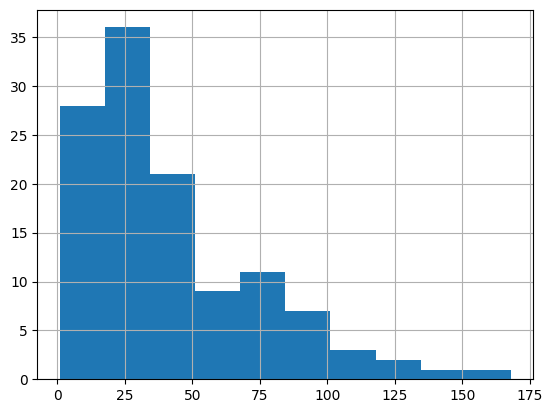

In [31]:
# histogram of Ozone
data_cleaned3['Ozone'].hist()

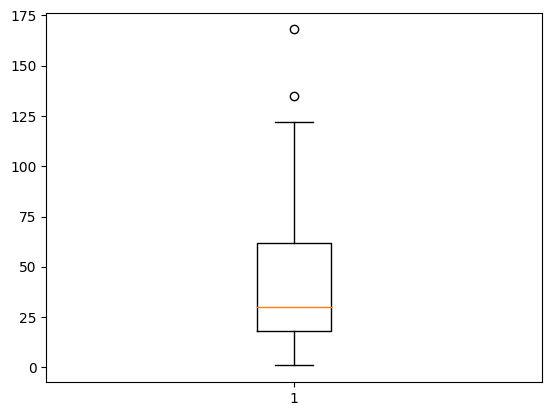

In [32]:
#Box plot
data_box=data_cleaned3.dropna()# data set is: data_box
data1_box=data_box.Ozone #in data1_box we are saving ozone column
plt.boxplot(data1_box)
plt.show()

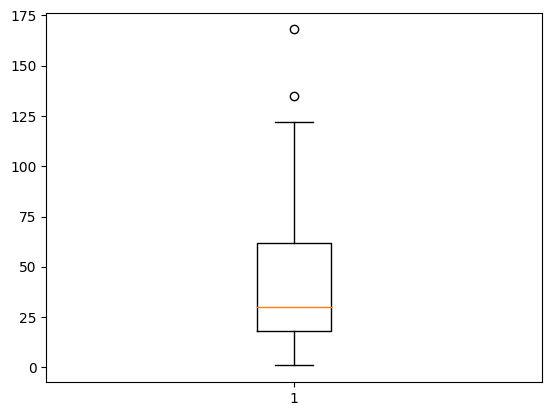

In [33]:
# Extracting outliers
box=plt.boxplot(data1_box)

In [34]:
box

{'whiskers': [<matplotlib.lines.Line2D at 0x7b3e486442b0>,
 'caps': [<matplotlib.lines.Line2D at 0x7b3e486447f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7b3e48817fd0>],
 'medians': [<matplotlib.lines.Line2D at 0x7b3e487f0af0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7b3e487f2350>],
 'means': []}

In [35]:
[item.get_ydata() for item in box['fliers']] #fliers are outliers - it returns outlier values from ozone column

[array([135., 168.])]

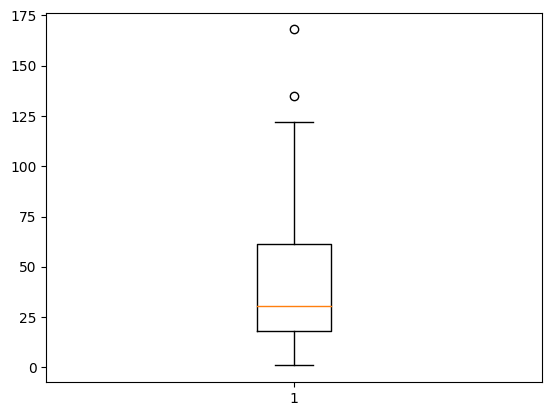

In [36]:
#Extracting outliers
box=plt.boxplot(data['Ozone'].dropna())

In [37]:
#Descriptive stat
data_cleaned3['Ozone'].describe()

count    119.000000
mean      41.815126
std       32.659249
min        1.000000
25%       18.000000
50%       31.000000
75%       62.000000
max      168.000000
Name: Ozone, dtype: float64

In [38]:
data_cleaned3

Ozone  Solar  Wind  Month  Day  Year  Temp Weather
1     41.0  190.0   7.4    5.0    1  2010    67       S
2     36.0  118.0   8.0    5.0    2  2010    72       C
3     12.0  149.0  12.6    5.0    3  2010    74      PS
4     18.0  313.0  11.5    5.0    4  2010    62       S
5      NaN    NaN  14.3    5.0    5  2010    56       S
..     ...    ...   ...    ...  ...   ...   ...     ...
153   20.0  223.0  11.5    9.0   30  2010    68       S
154   41.0  190.0   7.4    5.0    1  2010    67       C
155   30.0  193.0   6.9    9.0   26  2010    70      PS
156    NaN  145.0  13.2    9.0   27  2010    77       S
158   18.0  131.0   8.0    9.0   29  2010    76       C

[157 rows x 8 columns]

In [39]:
#Bar plot - to identify outliers in categorical data - get count of unique values
data['Weather'].value_counts()

S     59
C     49
PS    47
Name: Weather, dtype: int64

<Axes: >

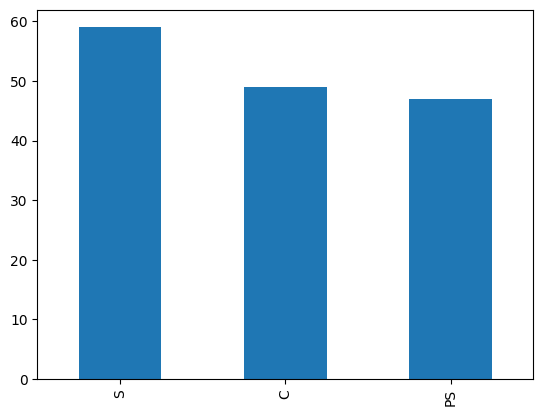

In [40]:
#Bar plot - to identify outliers in categorical data
data['Weather'].value_counts().plot.bar()

# Missing Values and Imputation

<Axes: >

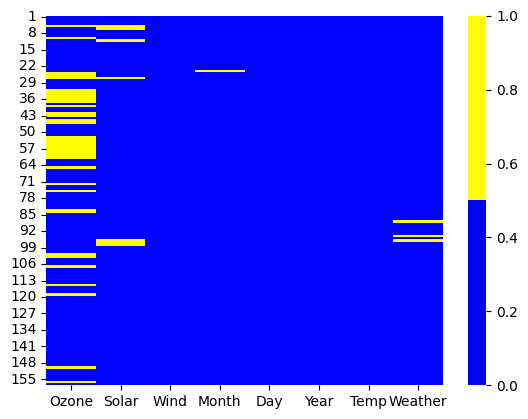

In [41]:
import seaborn as sns # in seaborn documentation color codes are mentioned
cols = data_cleaned3.columns # save column names in cols dataset
colours = ['blue','yellow'] # specify the colours - yellow is missing. blue is not missing.
#colours=['#000099', '#ffff00']
sns.heatmap(data_cleaned3[cols].isnull(),
            cmap=sns.color_palette(colours)) # map colors T = Yellow, F = Blue

<ipython-input-42-6d07241c7332>:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data_cleaned3.corr(),annot=True,cmap='viridis')


<Axes: >

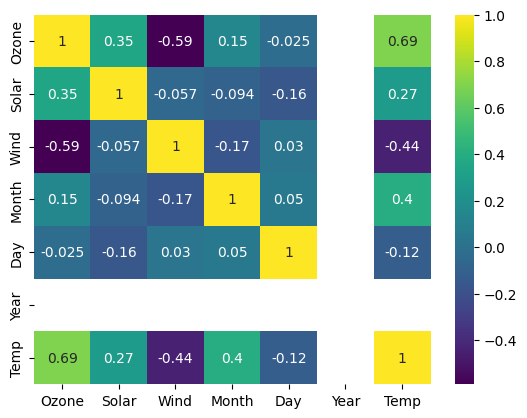

In [42]:
# When huge no. of numerical columns - go for heatmap with correlation values
#sns.heatmap(data_cleaned3.corr())
# white = strong positive correlation, Very light or very dark = strong positive or strong negative correlation
#sns.heatmap(data_cleaned3.corr(),annot=True) # with correlation values inside so that you can understand exact correlation between variables

# to change color coding execute following command using viridis color map
sns.heatmap(data_cleaned3.corr(),annot=True,cmap='viridis')

In [43]:
cols

Index(['Ozone', 'Solar', 'Wind', 'Month', 'Day', 'Year', 'Temp', 'Weather'], dtype='object')

In [44]:
data_cleaned3[data_cleaned3.isnull().any(axis=1)].head() # find cloumn wise null values

Ozone  Solar  Wind  Month  Day  Year  Temp Weather
5     NaN    NaN  14.3    5.0    5  2010    56       S
6    28.0    NaN  14.9    5.0    6  2010    66       C
10    NaN  194.0   8.6    5.0   10  2010    69       S
11    7.0    NaN   6.9    5.0   11  2010    74       C
24   32.0   92.0  12.0    NaN   24  2010    61       C

In [45]:
data_cleaned3.isnull().sum()

Ozone      38
Solar       7
Wind        0
Month       1
Day         0
Year        0
Temp        0
Weather     3
dtype: int64

In [46]:
data_cleaned3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 157 entries, 1 to 158
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   Ozone    119 non-null    float64 
 1   Solar    150 non-null    float64 
 2   Wind     157 non-null    float64 
 3   Month    156 non-null    float64 
 4   Day      157 non-null    int64   
 5   Year     157 non-null    int64   
 6   Temp     157 non-null    int64   
 7   Weather  154 non-null    category
dtypes: category(1), float64(4), int64(3)
memory usage: 10.1 KB


In [47]:
#Mean Imputation
mean = data_cleaned3['Ozone'].mean()
mean

41.81512605042017

In [48]:
data_cleaned3['Ozone'] = data_cleaned3['Ozone'].fillna(mean) # use mean of ozone col. to fill na values

In [ ]:
data_cleaned3.info()

In [50]:
#Missing value imputation for categorical vlaue
#Get the object columns
obj_columns=data_cleaned3[['Weather']]

In [ ]:
obj_columns

In [52]:
obj_columns.isnull().sum()

Weather    3
dtype: int64

In [53]:
#Missing value imputation for categorical vlaue
obj_columns=obj_columns.fillna(obj_columns.mode().iloc[0])

In [ ]:
obj_columns

In [55]:
obj_columns.isnull().sum()

Weather    0
dtype: int64

In [56]:
data_cleaned3

Ozone  Solar  Wind  Month  Day  Year  Temp Weather
1    41.000000  190.0   7.4    5.0    1  2010    67       S
2    36.000000  118.0   8.0    5.0    2  2010    72       C
3    12.000000  149.0  12.6    5.0    3  2010    74      PS
4    18.000000  313.0  11.5    5.0    4  2010    62       S
5    41.815126    NaN  14.3    5.0    5  2010    56       S
..         ...    ...   ...    ...  ...   ...   ...     ...
153  20.000000  223.0  11.5    9.0   30  2010    68       S
154  41.000000  190.0   7.4    5.0    1  2010    67       C
155  30.000000  193.0   6.9    9.0   26  2010    70      PS
156  41.815126  145.0  13.2    9.0   27  2010    77       S
158  18.000000  131.0   8.0    9.0   29  2010    76       C

[157 rows x 8 columns]

In [57]:
obj_columns.shape

(157, 1)

In [58]:
data_cleaned4=data_cleaned3.drop(['Weather'],axis=1,inplace=True)

In [60]:
data_cleaned4

In [61]:
#Join the data set with imputed object dataset
data_cleaned4=pd.concat([data_cleaned3,obj_columns],axis=1)

In [62]:
data_cleaned4

Ozone  Solar  Wind  Month  Day  Year  Temp Weather
1    41.000000  190.0   7.4    5.0    1  2010    67       S
2    36.000000  118.0   8.0    5.0    2  2010    72       C
3    12.000000  149.0  12.6    5.0    3  2010    74      PS
4    18.000000  313.0  11.5    5.0    4  2010    62       S
5    41.815126    NaN  14.3    5.0    5  2010    56       S
..         ...    ...   ...    ...  ...   ...   ...     ...
153  20.000000  223.0  11.5    9.0   30  2010    68       S
154  41.000000  190.0   7.4    5.0    1  2010    67       C
155  30.000000  193.0   6.9    9.0   26  2010    70      PS
156  41.815126  145.0  13.2    9.0   27  2010    77       S
158  18.000000  131.0   8.0    9.0   29  2010    76       C

[157 rows x 8 columns]

In [ ]:
data_cleaned4.isnull().sum()

In [ ]:
data_cleaned4

# Scatter plot and Correlation analysis

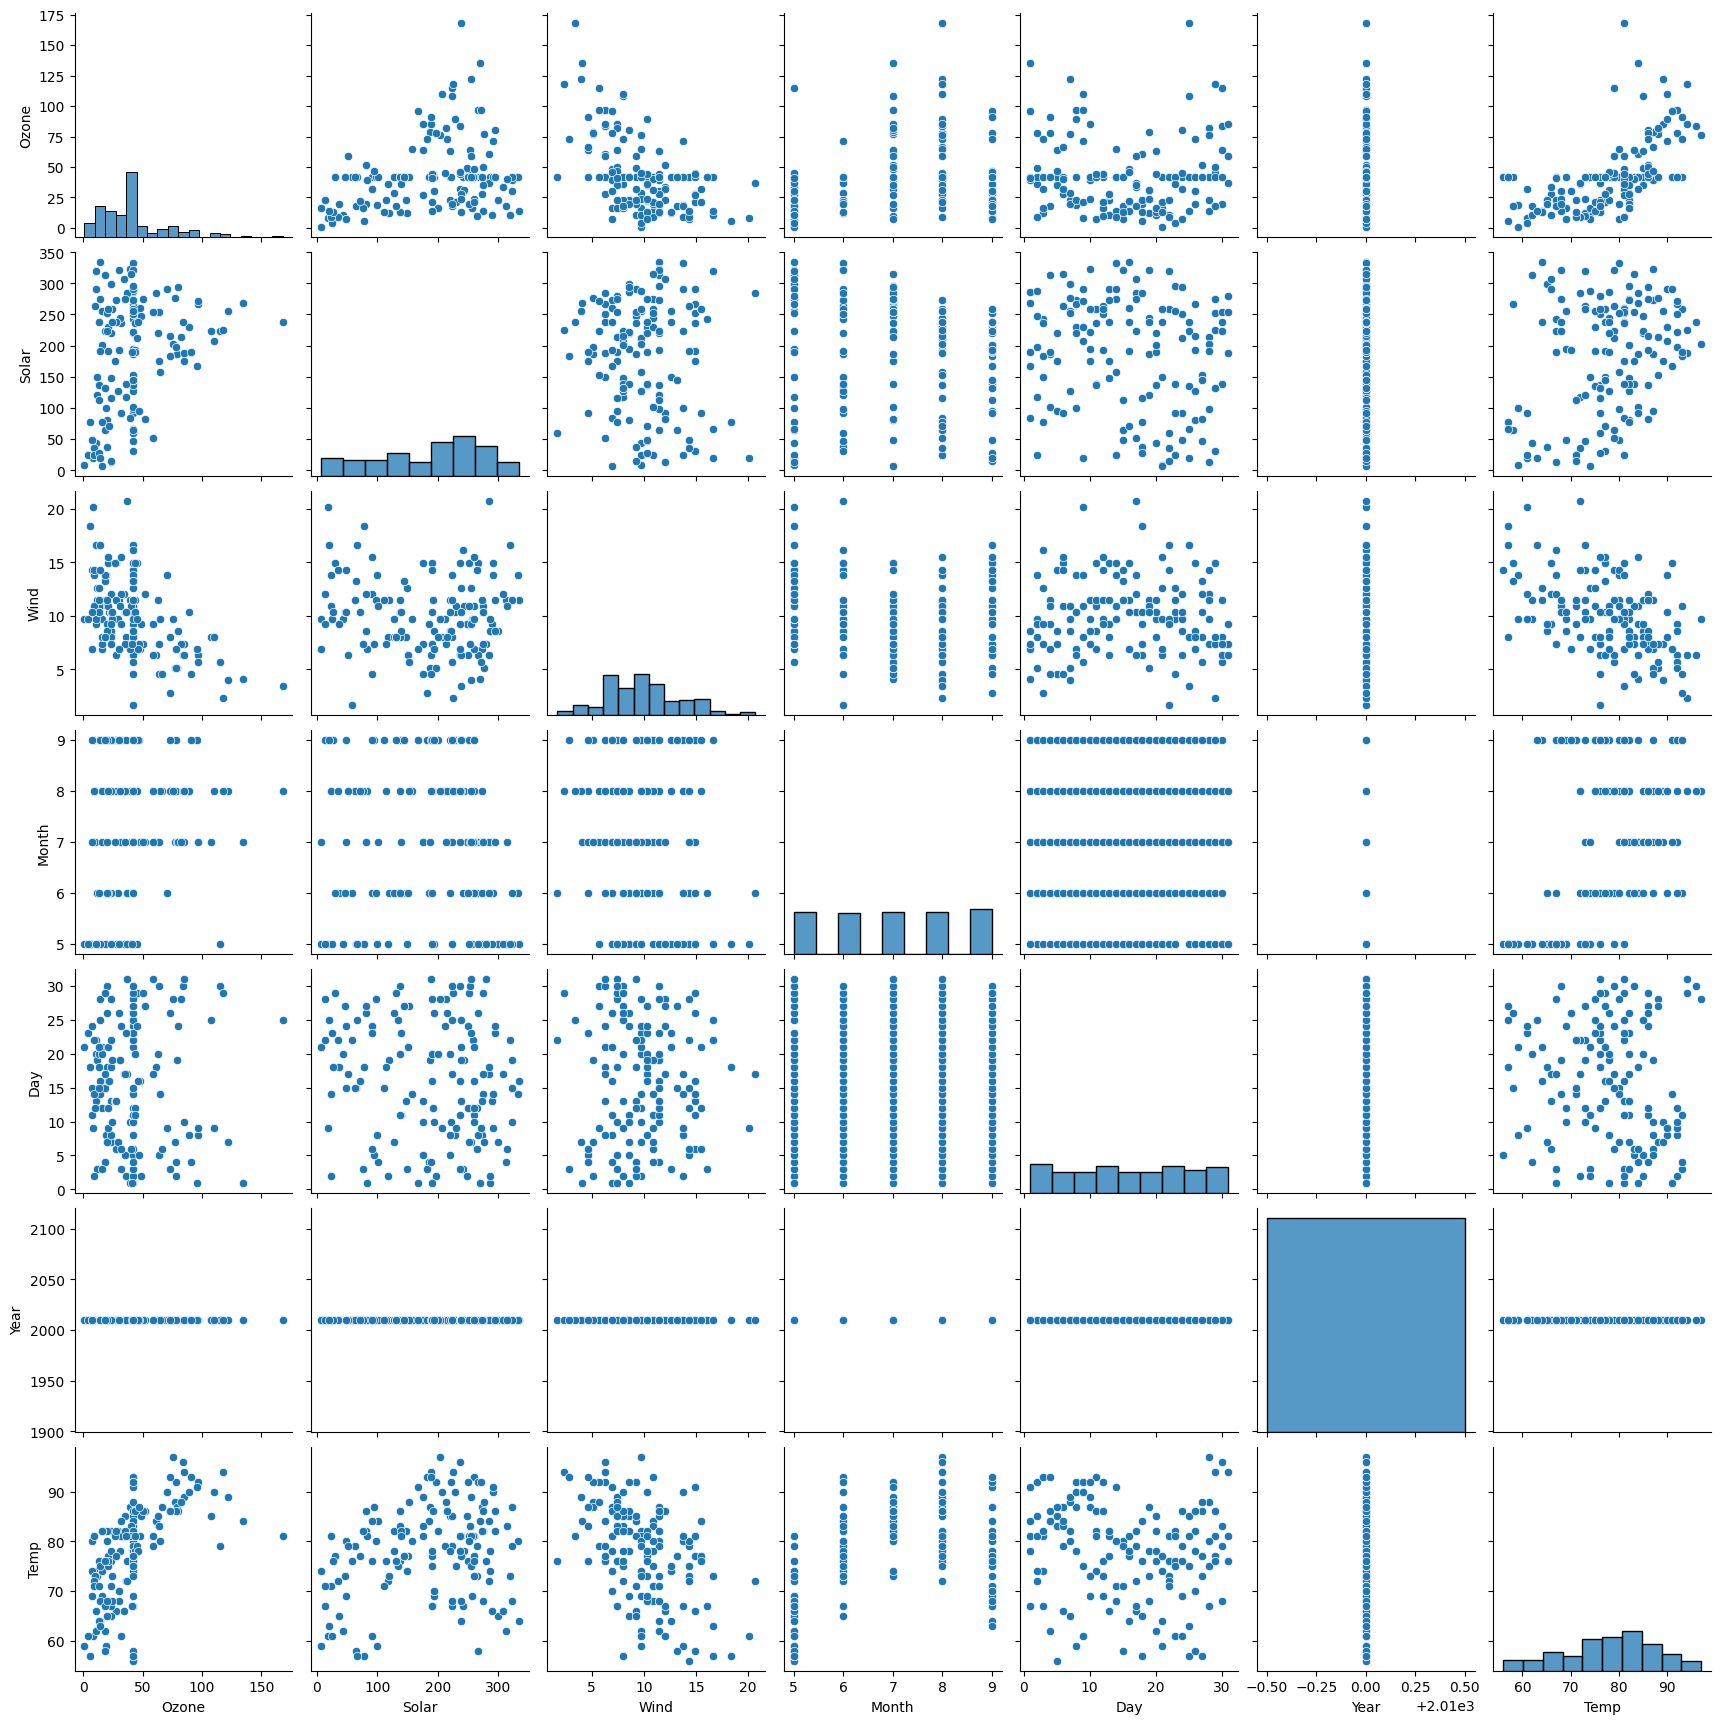

In [64]:
# Seaborn visualization library
import seaborn as sns
# Create the default pairplot
#pd.plotting.scatter_matrix(data_cleaned3)
sns.pairplot(data_cleaned3) # diagonal - histogram, other - scatter plot

In [65]:
#Correlation
data_cleaned3.corr() # corr. between same variables is always 1.

Ozone     Solar      Wind     Month       Day  Year      Temp
Ozone  1.000000  0.308687 -0.520004  0.132860 -0.021916   NaN  0.606500
Solar  0.308687  1.000000 -0.057407 -0.094012 -0.155663   NaN  0.273558
Wind  -0.520004 -0.057407  1.000000 -0.166216  0.029900   NaN -0.441228
Month  0.132860 -0.094012 -0.166216  1.000000  0.050055   NaN  0.398516
Day   -0.021916 -0.155663  0.029900  0.050055  1.000000   NaN -0.122787
Year        NaN       NaN       NaN       NaN       NaN   NaN       NaN
Temp   0.606500  0.273558 -0.441228  0.398516 -0.122787   NaN  1.000000

# Transformations

#### Dummy Variable

In [ ]:
data_cleaned4

In [66]:
#Creating dummy variable for Weather column
data_cleaned4=pd.get_dummies(data,columns=['Weather'])

In [ ]:
data_cleaned4

In [69]:
data_cleaned4=data_cleaned4.dropna()

In [ ]:
data_cleaned4

#### Normalization of the data

In [71]:
#Normalization of the data
from numpy import set_printoptions
from sklearn.preprocessing import MinMaxScaler

In [72]:
data_cleaned4.values

array([[ 41. , 190. ,   7.4, ...,   0. ,   0. ,   1. ],
       [ 36. , 118. ,   8. , ...,   1. ,   0. ,   0. ],
       [ 12. , 149. ,  12.6, ...,   0. ,   1. ,   0. ],
       ...,
       [ 30. , 193. ,   6.9, ...,   0. ,   1. ,   0. ],
       [ 14. , 191. ,  14.3, ...,   0. ,   0. ,   1. ],
       [ 18. , 131. ,   8. , ...,   1. ,   0. ,   0. ]])

In [73]:
array = data_cleaned4.values

scaler = MinMaxScaler(feature_range=(0,1)) # desired range of transformed data 0 to 1
rescaledX = scaler.fit_transform(array)# apply normalization on array

#transformed data
set_printoptions(precision=2)
print(rescaledX[0:5,:])


[[0.24 0.56 0.28 0.25 0.   0.   0.   0.25 0.   0.   1.  ]
 [0.21 0.34 0.31 0.38 0.   0.03 0.   0.38 1.   0.   0.  ]
 [0.07 0.43 0.56 0.43 0.   0.07 0.   0.43 0.   1.   0.  ]
 [0.1  0.94 0.5  0.12 0.   0.1  0.   0.12 0.   0.   1.  ]
 [0.13 0.89 0.34 0.2  0.   0.2  0.   0.2  0.   1.   0.  ]]


In [74]:
# Standardize data (0 mean, 1 stdev)
from sklearn.preprocessing import StandardScaler

In [ ]:
array = data_cleaned4.values
scaler = StandardScaler() # create instance of StandardScaler()
scaler.fit(array)
rescaledX = scaler.transform(array)

# summarize transformed data
set_printoptions(precision=2)
print(rescaledX[0:5,:])

# Speed up the EDA process

In [ ]:
!pip install pandas_profiling==3.1.0
!pip install -U ydata-profiling
!pip install sweetviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.3/357.3 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 12.3 MB/s eta 0:00:00
  Attempting uninstall: visions
    Found existing installation: visions 0.7.4
    Uninstalling visions-0.7.4:
      Successfully uninstalled visions-0.7.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-profiling 3.1.0 requires visions[type_image_path]==0.7.4, but you have visions 0.7.5 which is incompatible.


In [ ]:
import pandas_profiling as pp
import sweetviz as sv
# import joblib

<ipython-input-39-3f98d44af30e>:1: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  import pandas_profiling as pp


In [ ]:
df = pd.read_csv('data_clean.csv',index_col=0)
df.head(2)

Ozone  Solar.R  Wind Temp C Month  Day  Year  Temp Weather
1   41.0    190.0   7.4     67     5    1  2010    67       S
2   36.0    118.0   8.0     72     5    2  2010    72       C



*  For a dataset with less elements (unique values) than a given number (say 5) pandas_profiling assumes that your variable is categorical instead of numerical



In [ ]:
EDA_report=pp.ProfileReport(df)
EDA_report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
# in your dataset Year column is not at all important. Its datatype is Intger. In this column unique values are only 1 i.e. 2010.
#

EDA_report= pp.ProfileReport(data,vars={"num":{"low_categorical_threshold":0}})
#vars is a parameter of ProdileReport(). Pass a dictionary to vars
# where you have to specify for all the numerical columns keep threshold value as 0 zero
# i.e. no. of unique values in all numerical values to be kept as zero.
# So even if you have zero values in your numerical column do not convert it into categorical value, keep it as integer only


In [ ]:
EDA_report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
sweet_report = sv.analyze(data)
sweet_report.show_html('weather_report.html')